In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/CICIDS2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

0 0 0 65487 0 30094


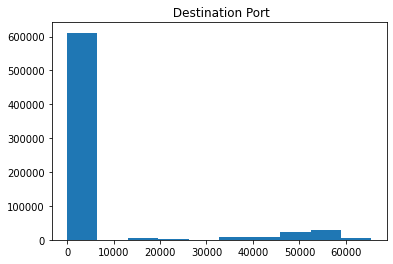

0 0 0 119999998 -1 363185


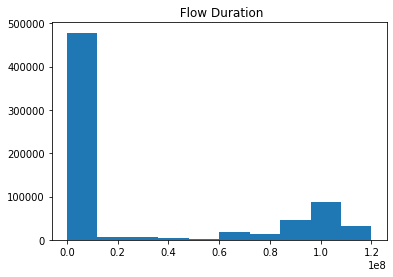

0 0 0 203943 1 685


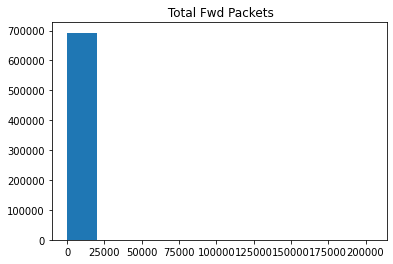

0 0 0 272353 0 859


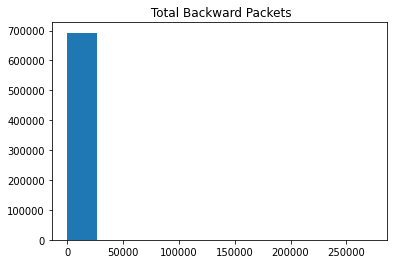

0 0 0 1224076 0 9380


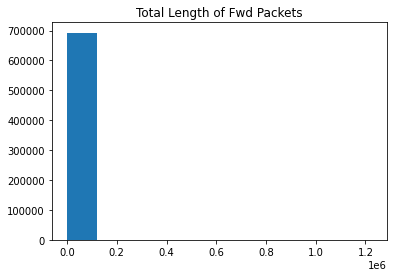

0 0 0 627000000 0 23483


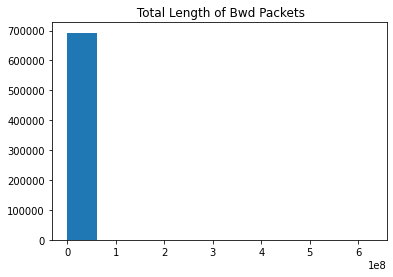

0 0 0 24820 0 3728


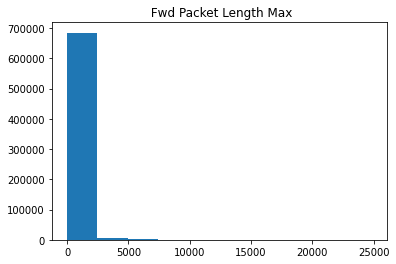

0 0 0 2065 0 220


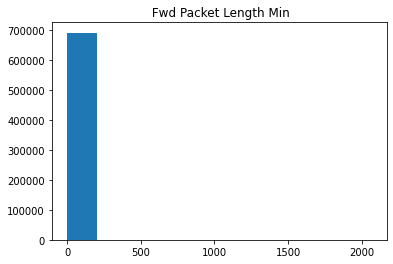

0 0 0 4640.757576 0.0 31471


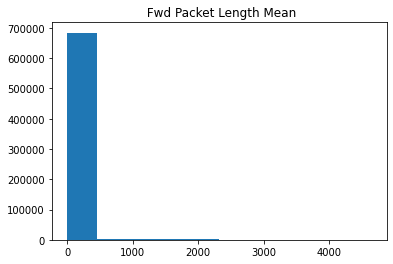

0 0 0 6429.190773 0.0 63498


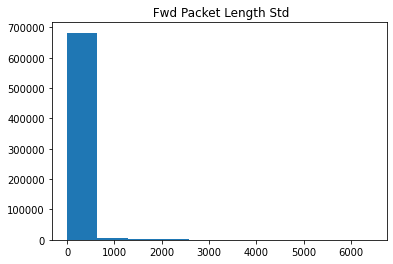

0 0 0 19530 0 3836


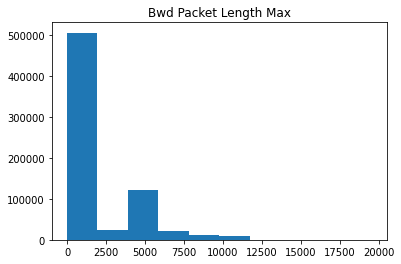

0 0 0 1983 0 429


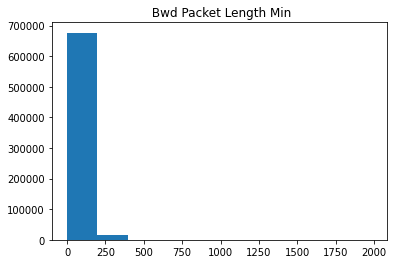

0 0 0 4370.686524 0.0 41095


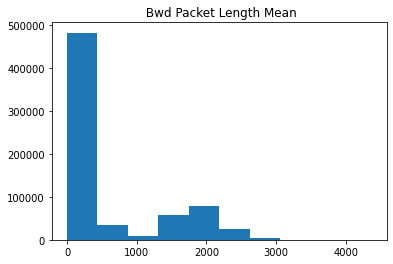

0 0 0 6715.738331 0.0 55643


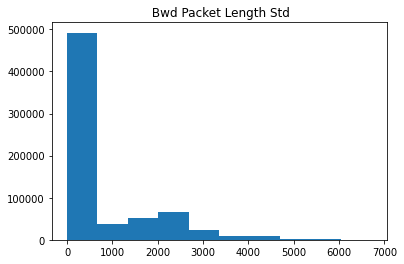

1297 1008 1008 2070000000.0 -12000000.0 450842


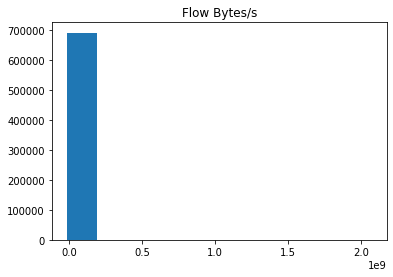

1297 0 0 3000000.0 -2000000.0 387031


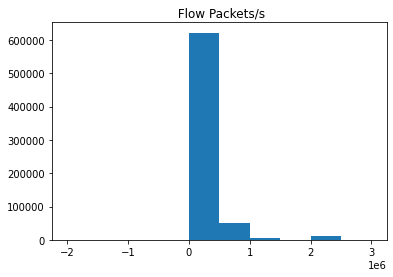

0 0 0 120000000.0 -1.0 370810


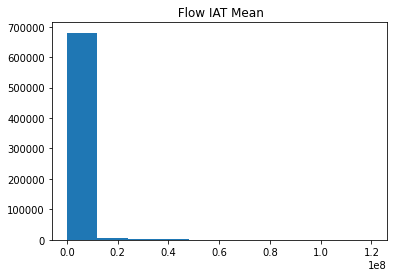

0 0 0 84800000.0 0.0 222370


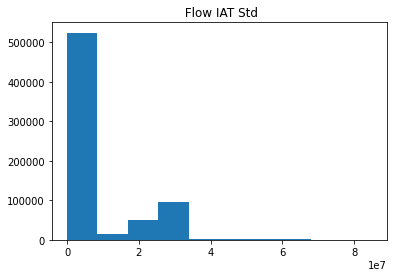

0 0 0 120000000 -1 148528


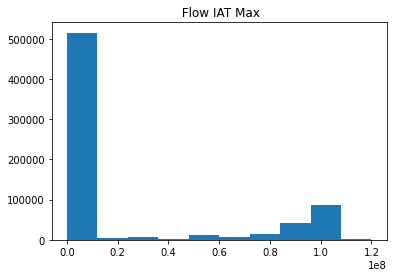

0 0 0 120000000 -14 47743


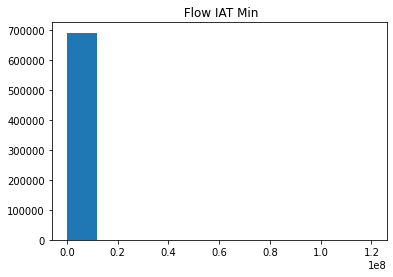

0 0 0 120000000 0 100832


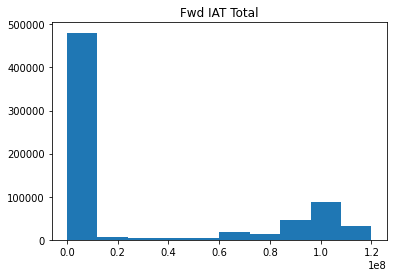

0 0 0 120000000.0 0.0 162817


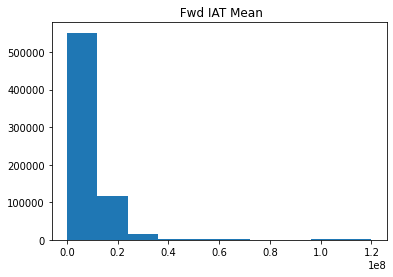

0 0 0 83700000.0 0.0 142925


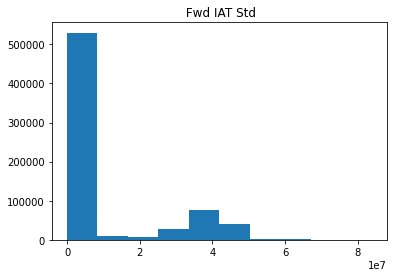

0 0 0 120000000 0 98682


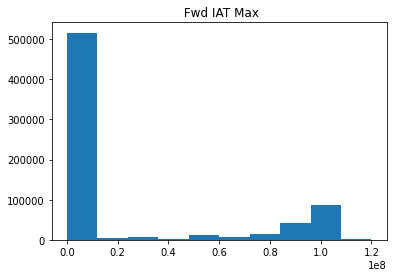

0 0 0 120000000 -8 37400


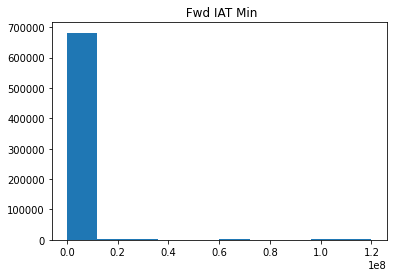

0 0 0 120000000 0 111743


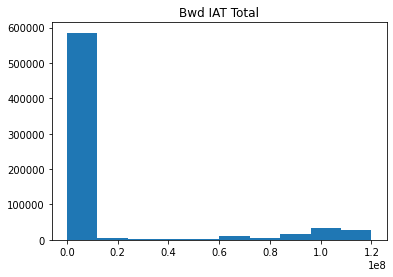

0 0 0 120000000.0 0.0 181207


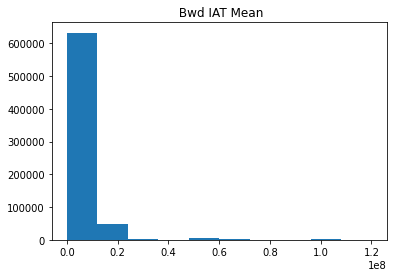

0 0 0 82900000.0 0.0 211343


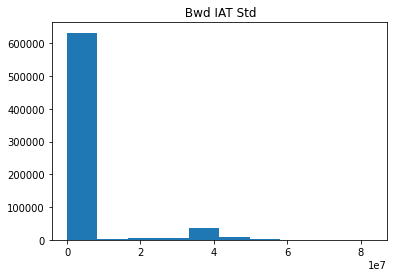

0 0 0 120000000 0 105600


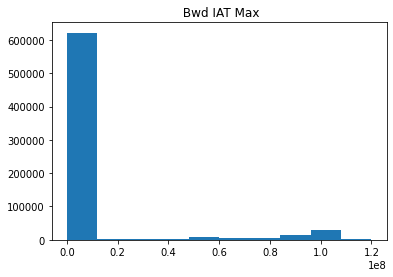

0 0 0 120000000 0 18812


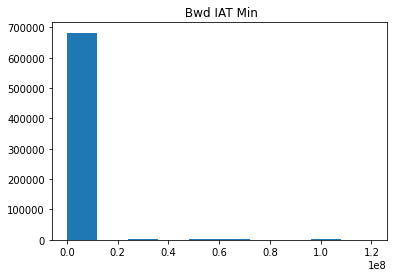

0 0 0 1 0 2


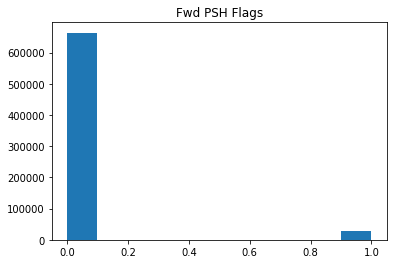

0 0 0 0 0 1


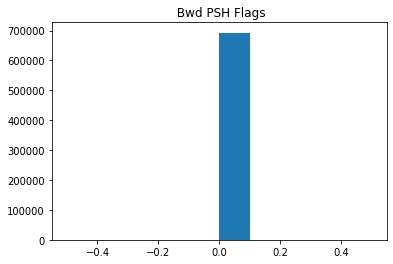

0 0 0 0 0 1


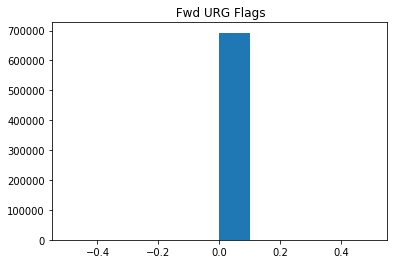

0 0 0 0 0 1


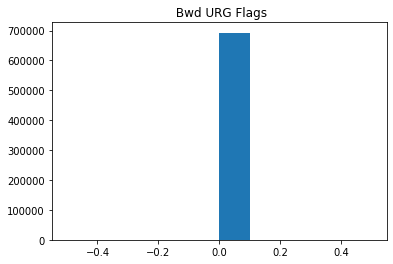

0 0 0 4290372 -11 1746


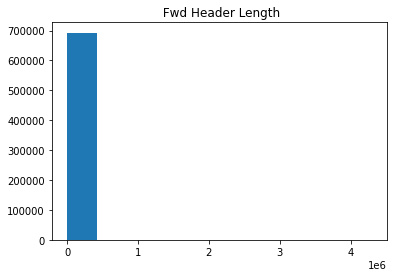

0 0 0 5447060 0 1910


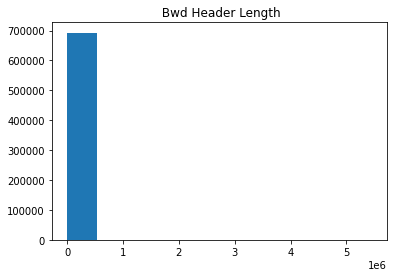

0 0 0 3000000.0 0.0 382443


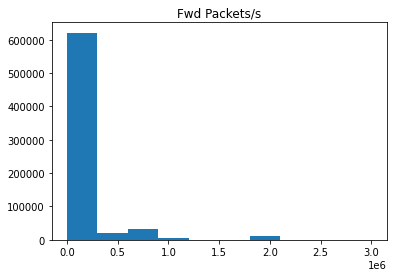

0 0 0 2000000.0 0.0 358777


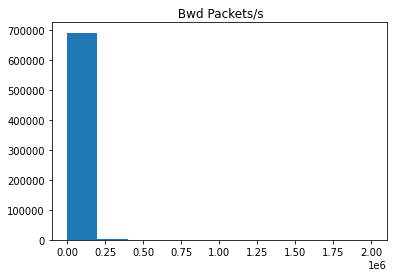

0 0 0 1448 0 166


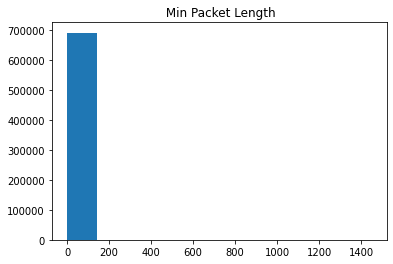

0 0 0 24820 0 4469


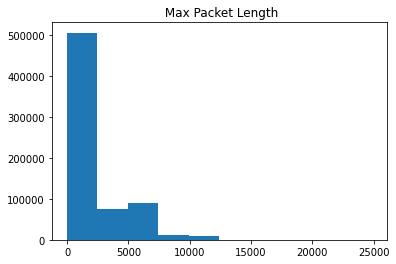

0 0 0 2279.754386 0.0 61803


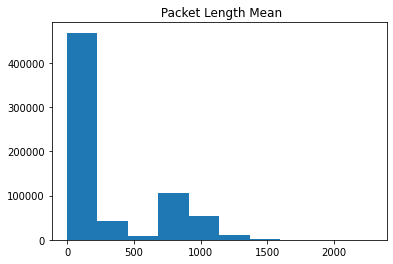

0 0 0 4364.022571 0.0 135696


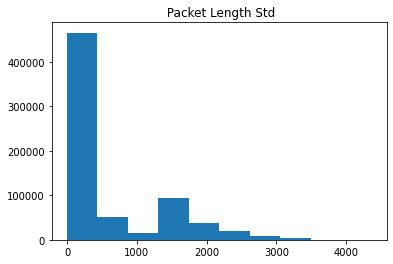

0 0 0 19000000.0 0.0 133816


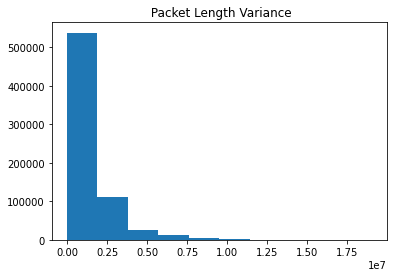

0 0 0 1 0 2


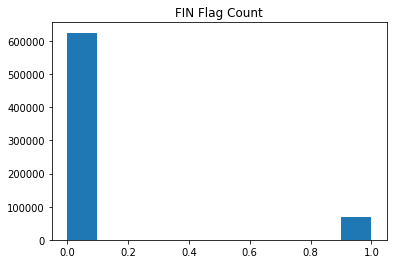

0 0 0 1 0 2


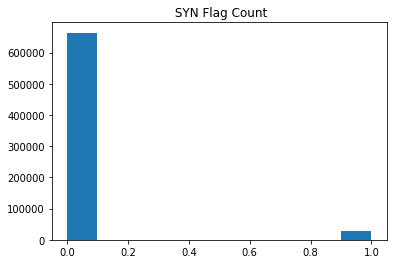

0 0 0 1 0 2


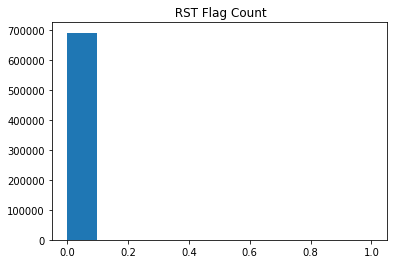

0 0 0 1 0 2


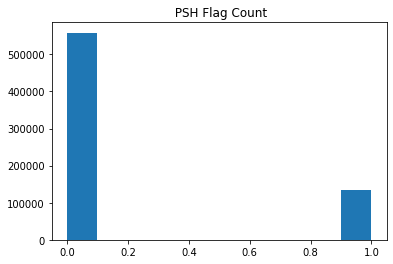

0 0 0 1 0 2


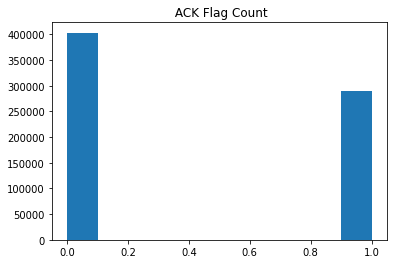

0 0 0 1 0 2


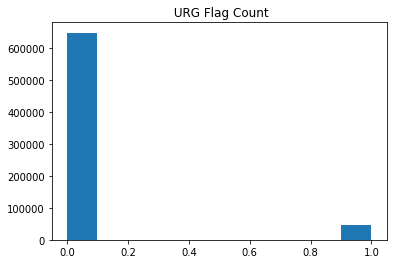

0 0 0 0 0 1


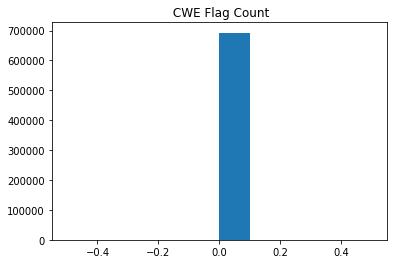

0 0 0 1 0 2


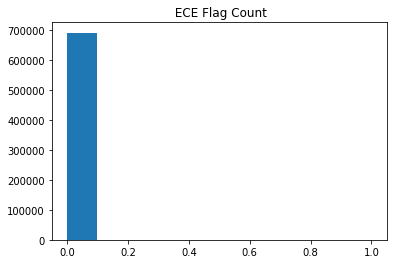

0 0 0 43 0 17


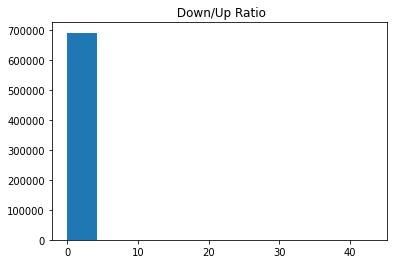

0 0 0 2612.0 0.0 60919


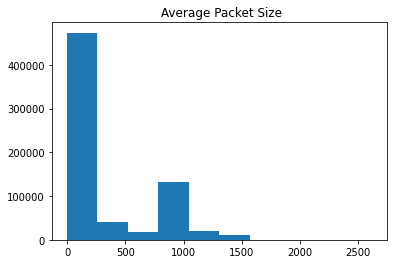

0 0 0 4640.757576 0.0 31471


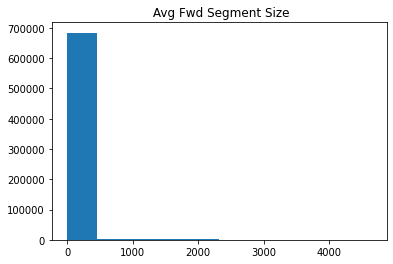

0 0 0 4370.686524 0.0 41095


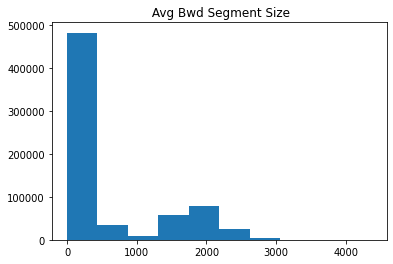

0 0 0 4290372 -11 1746


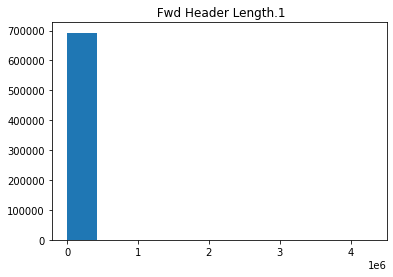

0 0 0 0 0 1


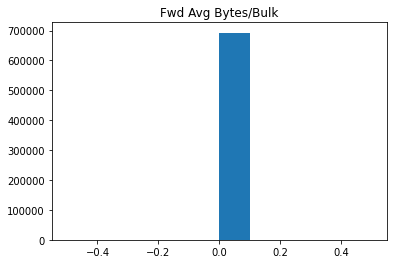

0 0 0 0 0 1


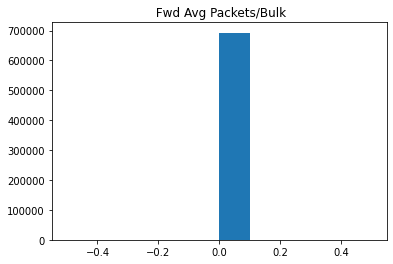

0 0 0 0 0 1


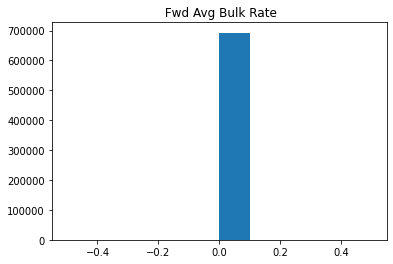

0 0 0 0 0 1


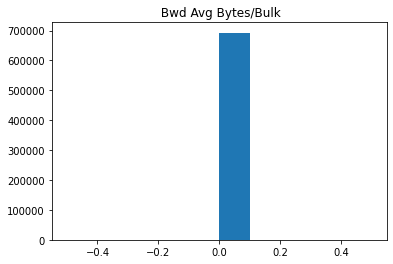

0 0 0 0 0 1


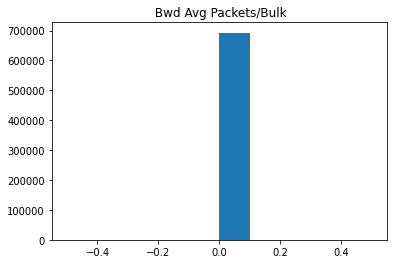

0 0 0 0 0 1


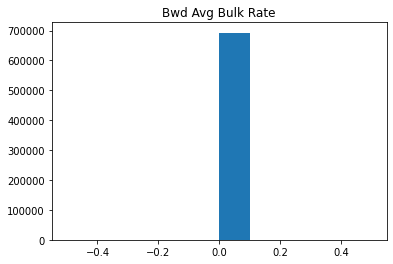

0 0 0 203943 1 685


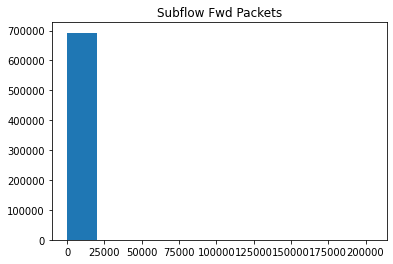

0 0 0 1224076 0 9380


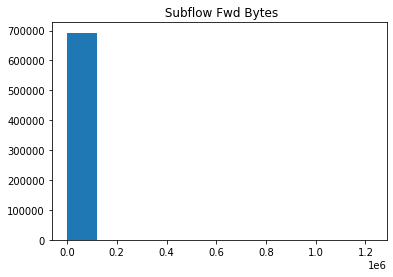

0 0 0 272353 0 859


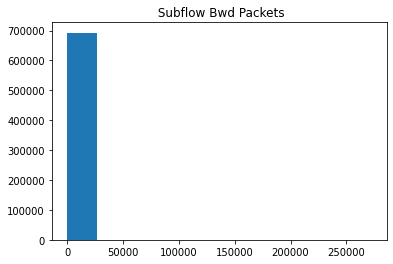

0 0 0 627046409 0 23486


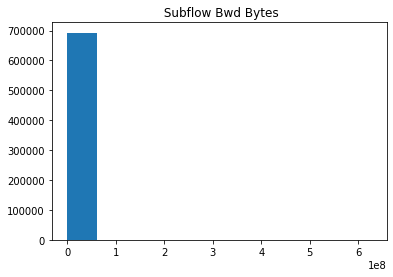

0 0 0 65535 -1 5698


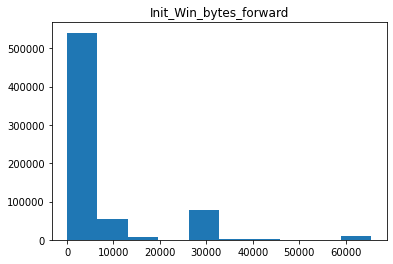

0 0 0 65535 -1 6049


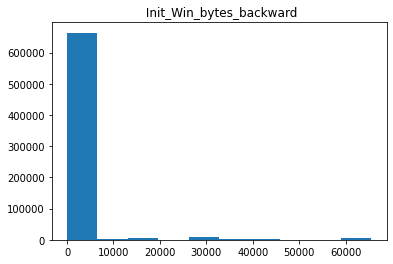

0 0 0 197124 0 564


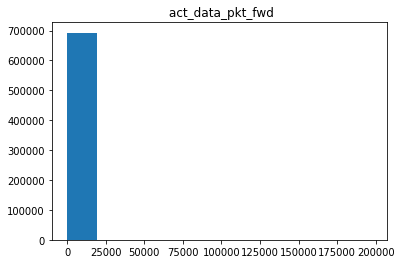

0 0 0 60 -1 13


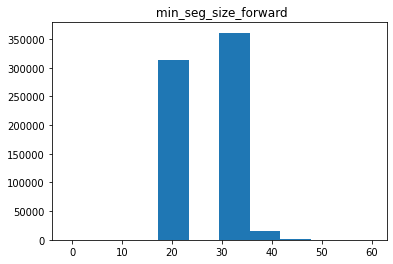

0 0 0 100000000.0 0.0 78864


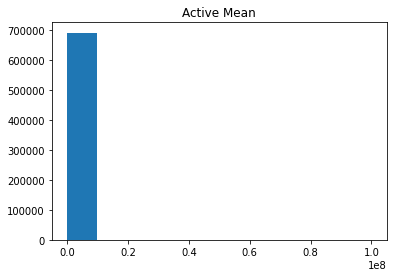

0 0 0 74200000.0 0.0 44220


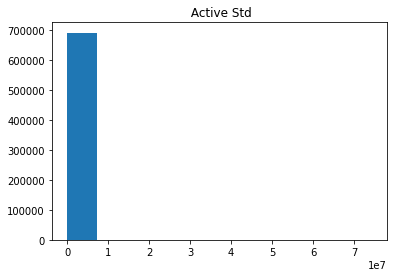

0 0 0 105000000 0 76777


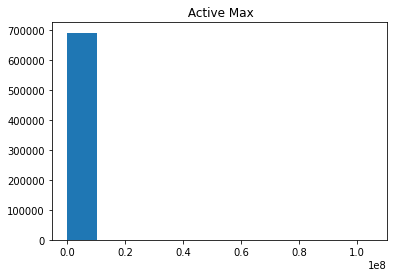

0 0 0 100000000 0 53325


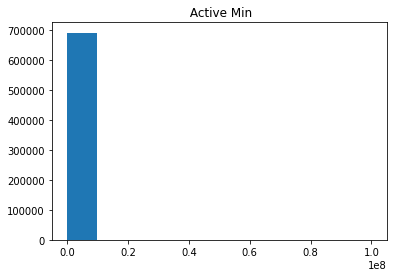

0 0 0 120000000.0 0.0 37601


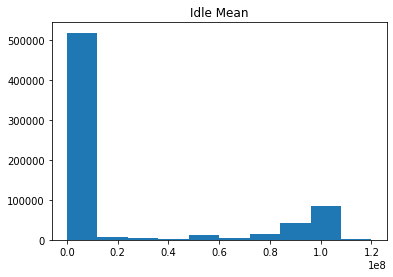

0 0 0 76900000.0 0.0 41528


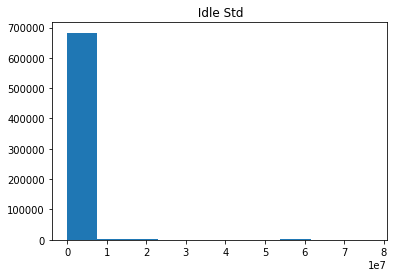

0 0 0 120000000 0 21986


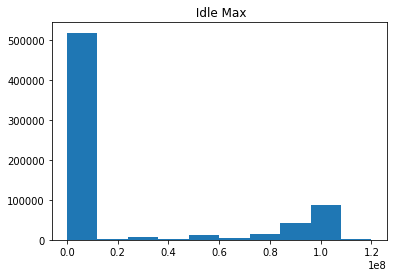

0 0 0 120000000 0 43869


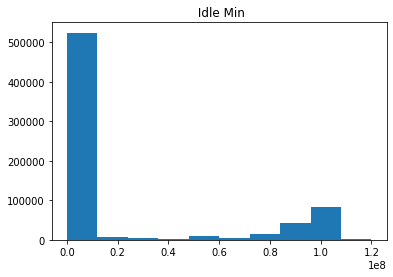

In [14]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
#         print(len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
#               max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

In [15]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
        print(col.dtypes,len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
              max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))

int64 0 0 0 65487 0 30094
int64 0 0 0 119999998 -1 363185
int64 0 0 0 203943 1 685
int64 0 0 0 272353 0 859
int64 0 0 0 1224076 0 9380
int64 0 0 0 627000000 0 23483
int64 0 0 0 24820 0 3728
int64 0 0 0 2065 0 220
float64 0 0 0 4640.757576 0.0 31471
float64 0 0 0 6429.190773 0.0 63498
int64 0 0 0 19530 0 3836
int64 0 0 0 1983 0 429
float64 0 0 0 4370.686524 0.0 41095
float64 0 0 0 6715.738331 0.0 55643
float64 1297 1008 1008 2070000000.0 -12000000.0 450842
float64 1297 0 0 3000000.0 -2000000.0 387031
float64 0 0 0 120000000.0 -1.0 370810
float64 0 0 0 84800000.0 0.0 222370
int64 0 0 0 120000000 -1 148528
int64 0 0 0 120000000 -14 47743
int64 0 0 0 120000000 0 100832
float64 0 0 0 120000000.0 0.0 162817
float64 0 0 0 83700000.0 0.0 142925
int64 0 0 0 120000000 0 98682
int64 0 0 0 120000000 -8 37400
int64 0 0 0 120000000 0 111743
float64 0 0 0 120000000.0 0.0 181207
float64 0 0 0 82900000.0 0.0 211343
int64 0 0 0 120000000 0 105600
int64 0 0 0 120000000 0 18812
int64 0 0 0 1 0 2
int64 0 0

In [24]:
labels = ['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk','DoS GoldenEye', 'Heartbleed']
lb_count = []
for lb in labels:
    lb_count.append(sum(df[' Label']==lb))
    print(sum(df[' Label']==lb))

440031
5796
5499
231073
10293
11


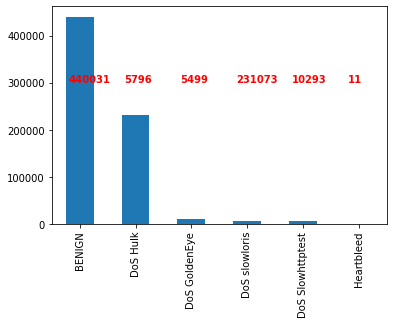

In [29]:
ax = df[' Label'].value_counts().plot(kind='bar')
for i in range(len(labels)):
    ax.text(i-0.2,300000, str(lb_count[i]), color='red', fontweight='bold')